In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


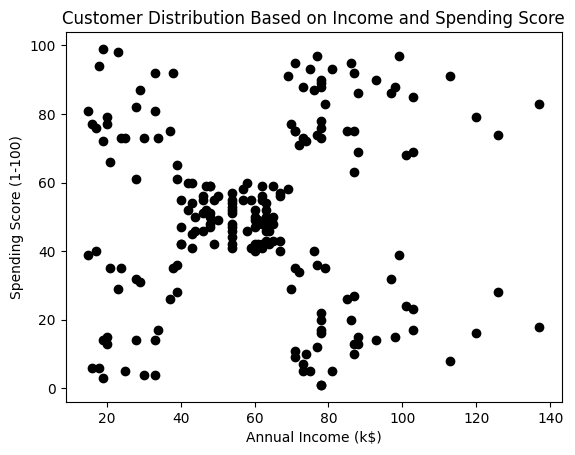

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the new dataset
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

# Selecting Annual Income and Spending Score for clustering
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

# Visualize data points
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution Based on Income and Spending Score')
plt.show()


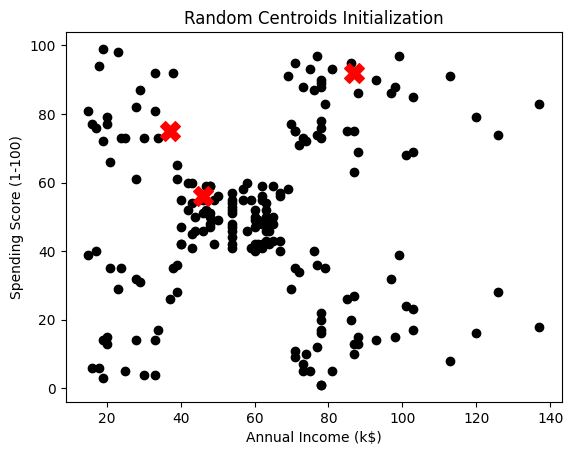

In [5]:
K = 3  # number of clusters

# Select random observations as centroids
Centroids = X.sample(n=K)

# Plot all data points
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c='black')

# Plot the randomly selected centroids
plt.scatter(Centroids["Annual Income (k$)"], Centroids["Spending Score (1-100)"], c='red', s=200, marker='X')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Random Centroids Initialization')
plt.show()

C:\Users\SAI\AppData\Local\Temp\ipykernel_7300\2771008749.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
C:\Users\SAI\AppData\Local\Temp\ipykernel_7300\2771008749.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED


Difference: -1.1880009740474584
Difference: -1.6268231768231765
Difference: 1.1384302689180608
Difference: 0.1979140818858589
Difference: -1.2130453036053055
Difference: -0.9859491777216078
Difference: -0.07379031807671765
Difference: -0.18431748802167647
Difference: 0.5661754100708905
Difference: 0.4587431458054283
Difference: -0.35712288465278874
Difference: -0.26161345090201493
Difference: 0.18895804386217208
Difference: 1.3343436823227783
Difference: 1.7189296677705777
Difference: 2.6176436360906195
Difference: 0.3355960204277224
Difference: 0.07160293777226201
Difference: 0.0


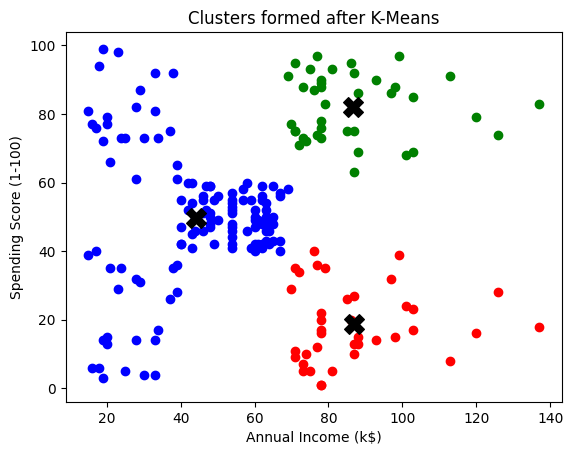

In [6]:
diff = 1
j = 0

while(diff != 0):
    XD = X.copy()
    i = 1
    for index1, row_c in Centroids.iterrows():
        ED = []
        for index2, row_d in XD.iterrows():
            d1 = (row_c["Annual Income (k$)"] - row_d["Annual Income (k$)"])**2
            d2 = (row_c["Spending Score (1-100)"] - row_d["Spending Score (1-100)"])**2
            d = np.sqrt(d1 + d2)
            ED.append(d)
        X[i] = ED
        i += 1

    C = []
    for index, row in X.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"] = C

    # Recompute centroids
    Centroids_new = X.groupby(["Cluster"]).mean()[["Annual Income (k$)", "Spending Score (1-100)"]]

    if j == 0:
        diff = 1
        j = j + 1
    else:
        diff = (Centroids_new["Annual Income (k$)"] - Centroids["Annual Income (k$)"]).sum() + \
               (Centroids_new["Spending Score (1-100)"] - Centroids["Spending Score (1-100)"]).sum()
        print("Difference:", diff.sum())

    Centroids = X.groupby(["Cluster"]).mean()[["Annual Income (k$)", "Spending Score (1-100)"]]

# Plot final clusters
color = ['red', 'blue', 'green']
for k in range(K):
    data = X[X["Cluster"] == k+1]
    plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], c=color[k])
plt.scatter(Centroids["Annual Income (k$)"], Centroids["Spending Score (1-100)"], c='black', marker='X', s=200)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters formed after K-Means')
plt.show()

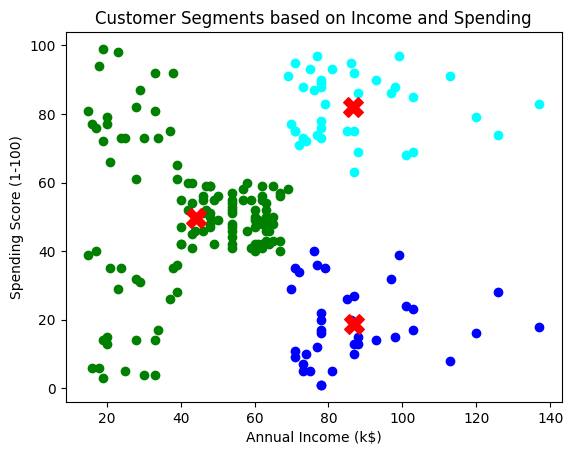

In [7]:
# Final plot with corrected columns
color = ['blue', 'green', 'cyan']
for k in range(K):
    data = X[X["Cluster"] == k+1]
    plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], c=color[k])

# Plot final centroids
plt.scatter(Centroids["Annual Income (k$)"], Centroids["Spending Score (1-100)"], c='red', marker='X', s=200)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments based on Income and Spending')
plt.show()
